In [1]:
#Packages
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn.datasets as skld
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

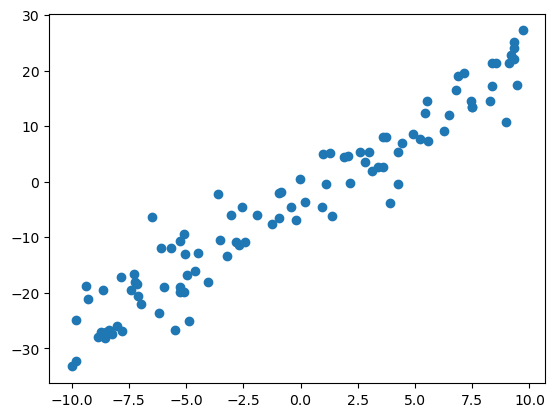

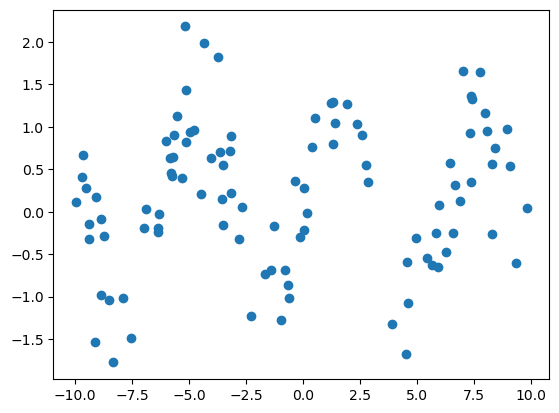

In [2]:
#Data generation

np.random.seed(13)

#Classification datasets
class_2_small = skld.make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 2, class_sep = 1, random_state = 13)
class_2_small_X, class_2_small_y = class_2_small

#Numeric datasets
#Simple one first
num_2_lin_small_x = np.random.uniform(low = -10, high = 10, size = 100)
errors = np.random.normal(0, 5, size = 100)
num_2_lin_small_y = num_2_lin_small_x * 2.5 - 2 + errors
plt.scatter(num_2_lin_small_x, num_2_lin_small_y)
plt.show()
#Now more complicated, nonlinear relationship
num_2_sin_small_x = np.random.uniform(low = -10, high = 10, size = 100)
errors = np.random.normal(0, 0.5, size = 100)
num_2_sin_small_y = np.sin(num_2_sin_small_x) + errors
plt.scatter(num_2_sin_small_x, num_2_sin_small_y)
plt.show()

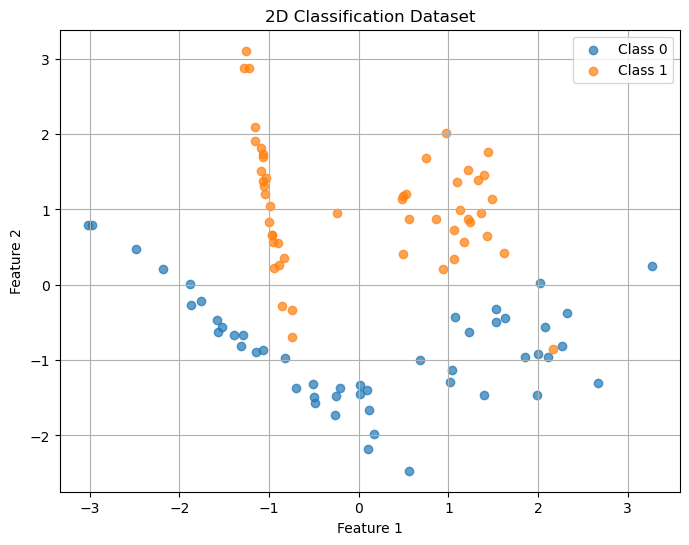

In [3]:
#Graphing the Data
#Small Classification, 2 Classes, 2 Dimensions
plt.figure(figsize=(8, 6))
plt.scatter(class_2_small_X[class_2_small_y == 0][:, 0], class_2_small_X[class_2_small_y == 0][:, 1], label='Class 0', alpha=0.7)
plt.scatter(class_2_small_X[class_2_small_y == 1][:, 0], class_2_small_X[class_2_small_y == 1][:, 1], label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Classification Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#Making Neural Networks
#Classification function NN
class class_NN_ReLU(nn.Module):
    def __init__(self, n_dim_x = 2, n_class_y = 1, depth = 1, width = 2): #Specifications for input data form and neural network form
        super(class_NN_ReLU, self).__init__()
        layers = []
        #Input layer
        layers.append(nn.Linear(n_dim_x, width))
        layers.append(nn.ReLU())
        #Hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.ReLU())
        #Output layer; Allows for multiple class probability, make sure to use cross-entropy loss when evaluating criterion
        layers.append(nn.Linear(width, n_class_y))
        
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x) #Provides raw logits for use in cross-entropy loss

#Numeric function NN
class numeric_NN_ReLU(nn.Module):
    def __init__(self, n_dim_x = 2, n_dim_y = 1, depth = 1, width = 2):
        super(numeric_NN_ReLU, self).__init__()
        layers = []
        #Input layer
        layers.append(nn.Linear(n_dim_x, width))
        layers.append(nn.ReLU())
        #Hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.ReLU())
        #Output layer
        layers.append(nn.Linear(width, n_dim_y))
        
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

In [5]:
#Training and Testing NNs

class_2_small_X_train, class_2_small_X_test, class_2_small_y_train, class_2_small_y_test = train_test_split(class_2_small_X, class_2_small_y,
                                                                                                            test_size = 0.2, random_state = 13)
scaler = StandardScaler() #Scaling stuff
class_2_small_X_train = scaler.fit_transform(class_2_small_X_train)
class_2_small_X_test = scaler.transform(class_2_small_X_test)

class_2_small_X_train_tensor = torch.tensor(class_2_small_X_train, dtype=torch.float32) #Making stuff tensors (?)
class_2_small_y_train_tensor = torch.tensor(class_2_small_y_train, dtype=torch.long)
class_2_small_X_test_tensor = torch.tensor(class_2_small_X_test, dtype=torch.float32)
class_2_small_y_test_tensor = torch.tensor(class_2_small_y_test, dtype=torch.long)

model = class_NN_ReLU(n_dim_x=2, n_class_y=2, depth=1, width=16) #Model specifications and stuff
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100 #Training? IDK copied from chat
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(class_2_small_X_train_tensor)
    loss = criterion(outputs, class_2_small_y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval() #Evaluating, also copied from chat lol
with torch.no_grad():
    y_pred = model(class_2_small_X_test_tensor)
    predicted = torch.argmax(y_pred, dim=1)
    accuracy = (predicted == class_2_small_y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

Epoch [10/100], Loss: 0.5312
Epoch [20/100], Loss: 0.3378
Epoch [30/100], Loss: 0.2301
Epoch [40/100], Loss: 0.1883
Epoch [50/100], Loss: 0.1711
Epoch [60/100], Loss: 0.1603
Epoch [70/100], Loss: 0.1500
Epoch [80/100], Loss: 0.1411
Epoch [90/100], Loss: 0.1338
Epoch [100/100], Loss: 0.1278
Test Accuracy: 1.0000


In [ ]:
#Training and Testing NNs

num_2_lin_small_x = num_2_lin_small_x.reshape(-1, 1) #So no array mismatches
num_2_lin_small_y = num_2_lin_small_y.reshape(-1, 1)

num_2_lin_small_X_train, num_2_lin_small_X_test, num_2_lin_small_y_train, num_2_lin_small_y_test = train_test_split(num_2_lin_small_x, num_2_lin_small_y,
                                                                                                            test_size = 0.2, random_state = 13)
scaler = StandardScaler() #Scaling stuff
#num_2_lin_small_X_train = scaler.fit_transform(num_2_lin_small_X_train)
#num_2_lin_small_X_test = scaler.transform(num_2_lin_small_X_test)

num_2_lin_small_X_train_tensor = torch.tensor(num_2_lin_small_X_train, dtype=torch.float32) #Making stuff tensors (?)
num_2_lin_small_y_train_tensor = torch.tensor(num_2_lin_small_y_train, dtype=torch.float32)
num_2_lin_small_X_test_tensor = torch.tensor(num_2_lin_small_X_test, dtype=torch.float32)
num_2_lin_small_y_test_tensor = torch.tensor(num_2_lin_small_y_test, dtype=torch.float32)

model = numeric_NN_ReLU(n_dim_x=1, n_dim_y=1, depth=1, width=16) #Model specifications and stuff
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100 #Training? IDK copied from chat
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(num_2_lin_small_X_train_tensor)
    loss = criterion(outputs, num_2_lin_small_y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval() #Evaluating, also copied from chat lol
with torch.no_grad():
    y_pred = model(num_2_lin_small_X_test_tensor)
    test_loss = criterion(y_pred, num_2_lin_small_y_test_tensor)
    print(f"Test Loss: {test_loss:.4f}")

y_pred_np = y_pred.numpy()

plt.scatter(num_2_lin_small_X_test, num_2_lin_small_y_test, label='True')
plt.scatter(num_2_lin_small_X_test, y_pred_np, label='Predicted', alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("True vs Predicted")
plt.show()

In [ ]:
# 1. Create a meshgrid over the input space
h = 0.01  # step size in the mesh
x_min, x_max = class_2_small_X[:, 0].min() - 0.5, class_2_small_X[:, 0].max() + 0.5
y_min, y_max = class_2_small_X[:, 1].min() - 0.5, class_2_small_X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 2. Prepare grid points for model prediction
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)  # apply the same scaling as training data
grid_tensor = torch.tensor(grid_scaled, dtype=torch.float32)

# 3. Predict class scores from the model
with torch.no_grad():
    outputs = model(grid_tensor)
    probs = torch.softmax(outputs, dim=1)  # use softmax for multi-class
    predicted_classes = torch.argmax(probs, dim=1).numpy()

# 4. Reshape predictions to match the meshgrid
Z = predicted_classes.reshape(xx.shape)

# 5. Plot decision boundary and training points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(class_2_small_X[:, 0], class_2_small_X[:, 1], c=class_2_small_y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Decision Boundary of Neural Network")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#Loop to calculate Average Based on Width and Depth
    #Actually just doing based on depth rn

depths = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 75, 100]
iters_per = 10

avg_accuracy = []
zero_tot = []

for i in depths:
    accuracy_i = []
    zero_tot_i = []
    for _ in range(iters_per):     
        class_2_small_X_train, class_2_small_X_test, class_2_small_y_train, class_2_small_y_test = train_test_split(class_2_small_X, class_2_small_y,
                                                                                                                test_size = 0.2)
        scaler = StandardScaler() #Scaling stuff
        class_2_small_X_train = scaler.fit_transform(class_2_small_X_train)
        class_2_small_X_test = scaler.transform(class_2_small_X_test)
    
        class_2_small_X_train_tensor = torch.tensor(class_2_small_X_train, dtype=torch.float32) #Making stuff tensors (?)
        class_2_small_y_train_tensor = torch.tensor(class_2_small_y_train, dtype=torch.long)
        class_2_small_X_test_tensor = torch.tensor(class_2_small_X_test, dtype=torch.float32)
        class_2_small_y_test_tensor = torch.tensor(class_2_small_y_test, dtype=torch.long)
    
        model = class_NN_ReLU(n_dim_x=2, n_class_y=2, depth=i, width=16) #Model specifications and stuff
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    
        epochs = 100 #Training? IDK copied from chat
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(class_2_small_X_train_tensor)
            loss = criterion(outputs, class_2_small_y_train_tensor)
            loss.backward()
            optimizer.step()
            
        zero_params = 0 #Trying to count # of parameters that = 0, not working bc apparently none of them are zero??
        total_params = 0
        
        for param in model.parameters():
            if param.requires_grad:
                zero_params += torch.sum(param == 0).item()
                total_params += param.numel()

        zero_tot_i.append(zero_params)
        
        model.eval() #Evaluating, also copied from chat lol
        with torch.no_grad():
            y_pred = model(class_2_small_X_test_tensor)
            predicted = torch.argmax(y_pred, dim=1)
            accuracy = (predicted == class_2_small_y_test_tensor).float().mean()
        accuracy_i.append(accuracy)
    zero_tot.append(np.mean(zero_tot_i))
    avg_accuracy.append(np.mean(accuracy_i))
    plt.hist(accuracy_i)
    plt.show()
    print(i)

print(avg_accuracy)
plt.scatter(depths, avg_accuracy)
plt.show()

## Defining other activation functions

In [11]:
import torch
import torch.nn as nn

class class_NN_LeakyReLU(nn.Module):
    def __init__(self, n_dim_x = 2, n_class_y = 1, depth = 1, width = 2): #Specifications for input data form and neural network form
        super(class_NN_LeakyReLU, self).__init__()
        layers = []
        #Input layer
        layers.append(nn.Linear(n_dim_x, width))
        layers.append(nn.LeakyReLU())
        #Hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.LeakyReLU())
        #Output layer; Allows for multiple class probability, make sure to use cross-entropy loss when evaluating criterion
        layers.append(nn.Linear(width, n_class_y))
        
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


class class_NN_ELU(nn.Module): #CeLU looked very similar on pytorch documentation, we can try both but I'm not sure ther will be a huge difference
    def __init__(self, n_dim_x = 2, n_class_y = 1, depth = 1, width = 2): #Specifications for input data form and neural network form
        super(class_NN_ELU, self).__init__()
        layers = []
        #Input layer
        layers.append(nn.Linear(n_dim_x, width))
        layers.append(nn.ELU())
        #Hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.ELU())
        #Output layer; Allows for multiple class probability, make sure to use cross-entropy loss when evaluating criterion
        layers.append(nn.Linear(width, n_class_y))
        
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


class class_NN_PReLU(nn.Module): # documentation recommends not using weight decay with this training
    def __init__(self, n_dim_x = 2, n_class_y = 1, depth = 1, width = 2): #Specifications for input data form and neural network form
        super(class_NN_PReLU, self).__init__()
        layers = []
        #Input layer
        layers.append(nn.Linear(n_dim_x, width))
        layers.append(nn.PReLU())
        #Hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.PReLU())
        #Output layer; Allows for multiple class probability, make sure to use cross-entropy loss when evaluating criterion
        layers.append(nn.Linear(width, n_class_y))
        
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


class class_NN_SELU(nn.Module):
    def __init__(self, n_dim_x = 2, n_class_y = 1, depth = 1, width = 2): #Specifications for input data form and neural network form
        super(class_NN_SELU, self).__init__()
        layers = []
        #Input layer
        layers.append(nn.Linear(n_dim_x, width))
        layers.append(nn.SELU())
        #Hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.SELU())
        #Output layer; Allows for multiple class probability, make sure to use cross-entropy loss when evaluating criterion
        layers.append(nn.Linear(width, n_class_y))
        
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


class class_NN_ALReLU(nn.Module): # adjust this one into ALReLU?
    def __init__(self, n_dim_x = 2, n_class_y = 1, depth = 1, width = 2): #Specifications for input data form and neural network form
        super(class_NN_ALReLU, self).__init__()
        layers = []
        #Input layer
        layers.append(nn.Linear(n_dim_x, width))
        layers.append(nn.ReLU())
        #Hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.ReLU())
        #Output layer; Allows for multiple class probability, make sure to use cross-entropy loss when evaluating criterion
        layers.append(nn.Linear(width, n_class_y))
        
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


# The other activation we could use is from one of the papers we looked at (ALReLU), it doesn't have an existing Pytorch
# function built in

In [27]:
#Training and Testing NNs

class_2_small_X_train, class_2_small_X_test, class_2_small_y_train, class_2_small_y_test = train_test_split(class_2_small_X, class_2_small_y,
                                                                                                            test_size = 0.2, random_state = 13)
scaler = StandardScaler() #Scaling stuff
class_2_small_X_train = scaler.fit_transform(class_2_small_X_train)
class_2_small_X_test = scaler.transform(class_2_small_X_test)

class_2_small_X_train_tensor = torch.tensor(class_2_small_X_train, dtype=torch.float32) #Making stuff tensors (?)
class_2_small_y_train_tensor = torch.tensor(class_2_small_y_train, dtype=torch.long)
class_2_small_X_test_tensor = torch.tensor(class_2_small_X_test, dtype=torch.float32)
class_2_small_y_test_tensor = torch.tensor(class_2_small_y_test, dtype=torch.long)

### LeakyReLU

In [25]:
modelLeaky = class_NN_LeakyReLU(n_dim_x=2, n_class_y=2, depth=1, width=16) #Model specifications and stuff
criterionLeaky = nn.CrossEntropyLoss()
optimizerLeaky = optim.Adam(modelLeaky.parameters(), lr=0.01)

epochs = 100 #Training? IDK copied from chat
for epoch in range(epochs):
    modelLeaky.train()
    optimizerLeaky.zero_grad()
    outputsLeaky = modelLeaky(class_2_small_X_train_tensor)
    lossLeaky = criterionLeaky(outputs, class_2_small_y_train_tensor)
    lossLeaky.backward()
    optimizerLeaky.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

modelLeaky.eval() #Evaluating, also copied from chat lol
with torch.no_grad():
    y_predLeaky = modelLeaky(class_2_small_X_test_tensor)
    predicted = torch.argmax(y_predLeaky, dim=1)
    accuracy = (predicted == class_2_small_y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

y_pred_npLeaky = y_predLeaky.numpy()

plt.scatter(num_2_lin_small_X_test, num_2_lin_small_y_test, label='True')
plt.scatter(num_2_lin_small_X_test, y_pred_npLeaky, label='Predicted', alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("True vs Predicted")
plt.show()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [29]:
modelELU = class_NN_ELU(n_dim_x=2, n_class_y=2, depth=1, width=16) #Model specifications and stuff
criterionELU = nn.CrossEntropyLoss()
optimizerELU = optim.Adam(modelLeaky.parameters(), lr=0.01)

epochs = 100 #Training? IDK copied from chat
for epoch in range(epochs):
    modelELU.train()
    optimizerELU.zero_grad()
    outputsELU = modelELU(class_2_small_X_train_tensor)
    lossELU = criterionELU(outputs, class_2_small_y_train_tensor)
    lossELU.backward()
    optimizerELU.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

modelELU.eval() #Evaluating, also copied from chat lol
with torch.no_grad():
    y_predELU = modelELU(class_2_small_X_test_tensor)
    predicted = torch.argmax(y_predELU, dim=1)
    accuracy = (predicted == class_2_small_y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

y_pred_npELU = y_predELU.numpy()

plt.scatter(num_2_lin_small_X_test, num_2_lin_small_y_test, label='True')
plt.scatter(num_2_lin_small_X_test, y_pred_npELU, label='Predicted', alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("True vs Predicted")
plt.show()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.